# Q1  Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions3f6207cf040b) and create a word cloud to visualize frequently used words

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from selenium import webdriver

In [2]:
url='https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'
browser=webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [3]:
parent_tags = browser.find_elements_by_css_selector('div')
len(parent_tags)

246

In [4]:
para_tags = browser.find_elements_by_css_selector('div.section-content')
len(para_tags)

6

In [5]:
import bs4
sentences=''
for para in para_tags:
    para_text=para.get_attribute('innerHTML')
    sentences = sentences +' '+para_text
    sentences =bs4.BeautifulSoup(sentences,'html.parser').text
sentences

' Data Science and Machine Learning Interview QuestionsGeorge SeifBlockedUnblockFollowFollowingApr 25, 2018Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.Today I’m going to share with you all of the interview questions I

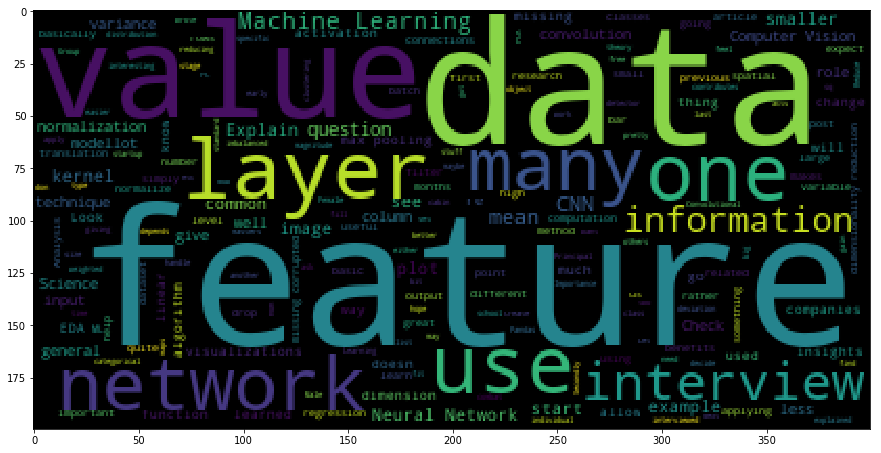

In [6]:
from wordcloud import WordCloud
wc=WordCloud().generate(sentences)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.show()

# Q2. Using amazon reviews data set do the following

a. create a corpus using sklearn package.

b. Create the Document Term Matrix using unigrams

c. Identify top 25 unigrams and filter their respective columns from DTM

d. Using these 25 columns, compute correlation matrix (if possible visualize the
same using seaborn heatmap function).

e. Using correlation matrix, Identify the pair of unigrams which has the highest
correlation value

In [15]:
dataset_amazon=pd.read_csv('amazon_reviews.csv')

In [16]:
dataset_amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [17]:
dataset_amazon.shape

(999, 10)

# Cleaning the reviewText

In [10]:
dataset_amazon['reviewText'].isnull().sum()

2

In [19]:
docs = dataset_amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '') # filling the null values with the ''
# and replacing the other [^a-z] with the '' and changing the case to lower letters

docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

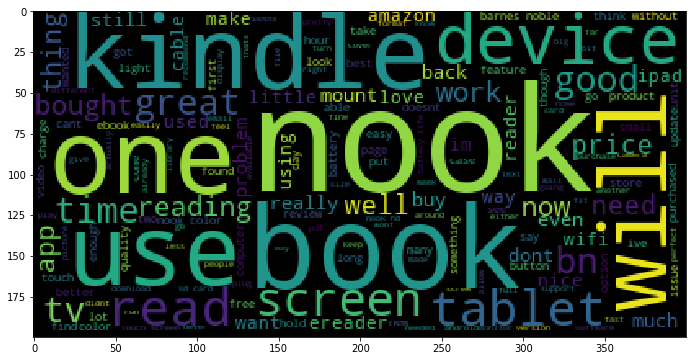

In [20]:
# word plt
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs))
plt.figure(figsize=(14,6))
plt.imshow(wc)
plt.show()
# while looking over the text i could not found any of them from non-english words

In [21]:
# removing the stopwords
stop_words=nltk.corpus.stopwords.words('english')
def clean_text(row):
    row_words=row.split(' ')
    clean_words=[word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)

docs_clean=docs.apply(clean_text)
docs_clean.head(1)

0    got gps husband otr road trucker  impressed sh...
Name: reviewText, dtype: object

 # Create the Document Term Matrix using unigrams

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv=CountVectorizer()

In [24]:
sparse_matrix=cv.fit_transform(docs_clean)

In [25]:
corpus=sparse_matrix.toarray()

In [26]:
corpus =pd.DataFrame(corpus,columns=cv.get_feature_names())

In [27]:
corpus.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
corpus.shape

(999, 9439)

# c. Identify top 25 unigrams and filter their respective columns from DTM

In [29]:
a=corpus.sum().sort_values(ascending=False)
top_25_columns=pd.DataFrame(a)

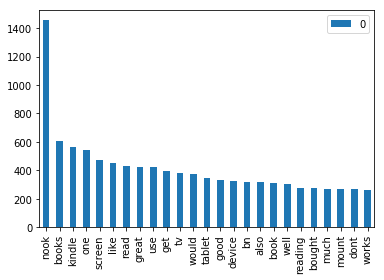

In [30]:
top_25_columns=top_25_columns[0:25]
top_25_columns.plot(kind='bar')

In [31]:
dtm_25=corpus[top_25_columns.index]

In [32]:
dtm_25.head()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
0,0,0,0,1,1,0,0,2,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,5,2,5,0,0,2,1,...,0,4,0,2,0,0,0,0,1,0
3,0,0,0,1,1,1,0,1,0,2,...,0,2,0,1,0,1,0,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# d. Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function)

In [35]:
words_correlation=dtm_25.corr()
print(words_correlation)

             nook     books    kindle       one    screen      like      read  \
nook     1.000000  0.624179  0.635081  0.391148  0.494755  0.561598  0.537788   
books    0.624179  1.000000  0.484799  0.358252  0.475797  0.523905  0.620132   
kindle   0.635081  0.484799  1.000000  0.272857  0.476808  0.497994  0.452000   
one      0.391148  0.358252  0.272857  1.000000  0.367750  0.423817  0.254724   
screen   0.494755  0.475797  0.476808  0.367750  1.000000  0.586531  0.457845   
like     0.561598  0.523905  0.497994  0.423817  0.586531  1.000000  0.503450   
read     0.537788  0.620132  0.452000  0.254724  0.457845  0.503450  1.000000   
great    0.314510  0.231877  0.148595  0.190833  0.230011  0.321089  0.266405   
use      0.474778  0.515817  0.313229  0.379005  0.365401  0.454838  0.482329   
get      0.388400  0.427794  0.322484  0.328058  0.330938  0.398528  0.370983   
tv      -0.099276 -0.096621 -0.106630  0.087054 -0.080098 -0.072430 -0.103311   
would    0.318301  0.410830 

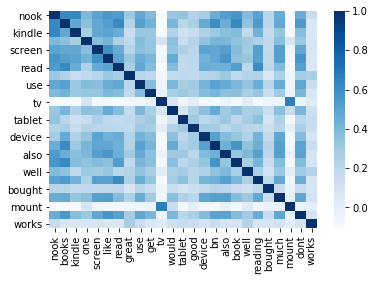

In [34]:
import seaborn as sns
sns.heatmap(words_correlation,cmap='Blues')

# e. Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

In [36]:
s = words_correlation.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so_t =s.sort_values(kind='quicksort',ascending=True)

In [37]:
so=pd.DataFrame(so)
so_t=pd.DataFrame(so_t)

In [40]:
so[25:].head() # highest Correlation on the increasing trend (positive side)

,,0
tv,mount,0.670188
mount,tv,0.670188
nook,kindle,0.635081
kindle,nook,0.635081
books,book,0.626593


In [42]:
so_t.head()# highest correlation on the downward trend (negative side)

,,0
tv,kindle,-0.106630
kindle,tv,-0.106630
nook,mount,-0.106126
mount,nook,-0.106126
tv,read,-0.103311


# Q3. Using the above Document Term Matrix

a. Use K-means clustering to cluster the reviews in to four groups

b. Plot a bar chart to display no. of documents under each group

c. Create Word cloud for each group

In [151]:
dtm_25.head()

,nook,books,kindle,one,it,screen,like,great,read,use,...,good,book,well,also,reading,reader,bought,much,the,mount
0,0,0,0,1,0,1,0,2,0,2,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,5,0,2,5,0,0,2,...,0,0,2,4,0,0,0,0,0,0
3,0,0,0,1,0,1,1,1,0,0,...,0,0,1,2,0,0,1,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# a. Use K-means clustering to cluster the reviews in to four group

# Here I am taking the top 25 columns and fitting into my model because it does

In [64]:
from sklearn.cluster import KMeans

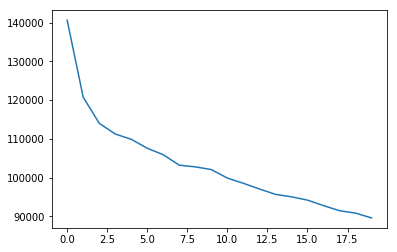

In [65]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(corpus)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [66]:
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(dtm_25)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
corpus['Review_Groups']=model_clus5.labels_

# b. Plot a bar chart to display no. of documents under each group

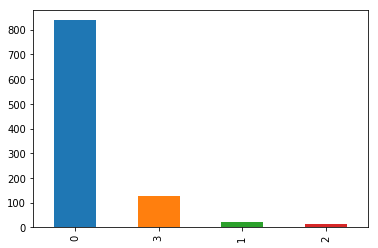

In [68]:
corpus['Review_Groups'].value_counts().plot(kind='bar')

# c. Create Word cloud for each group

In [69]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [71]:

corpus_0=corpus[corpus['Review_Groups']==0]
print(corpus_0.shape)

corpus_1=corpus[corpus['Review_Groups']==1]
print(corpus_1.shape)


corpus_2=corpus[corpus['Review_Groups']==2]
print(corpus_2.shape)


corpus_3=corpus[corpus['Review_Groups']==3]
print(corpus_3.shape)


(838, 9440)
(20, 9440)
(13, 9440)
(128, 9440)


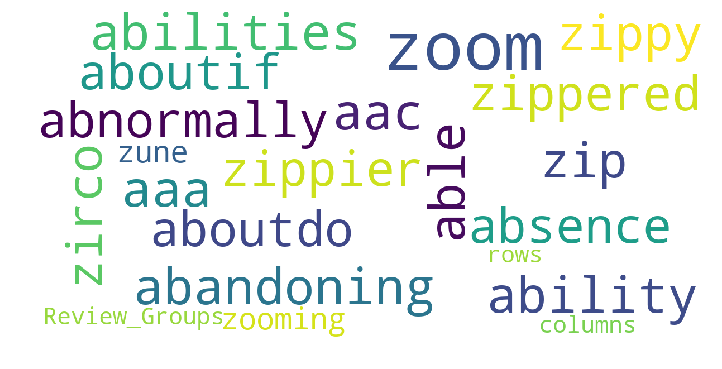

In [72]:
show_wordcloud(corpus_0)

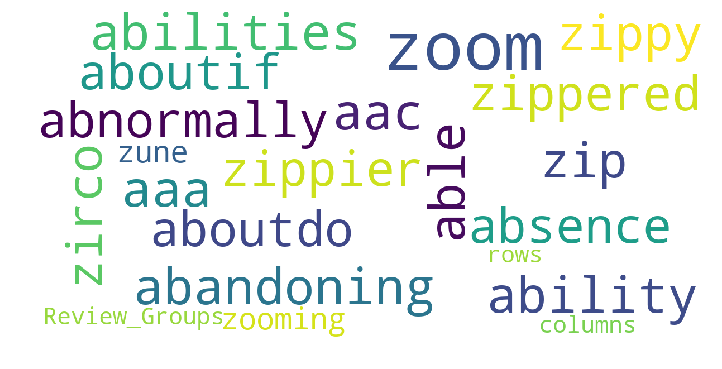

In [73]:
show_wordcloud(corpus_1)

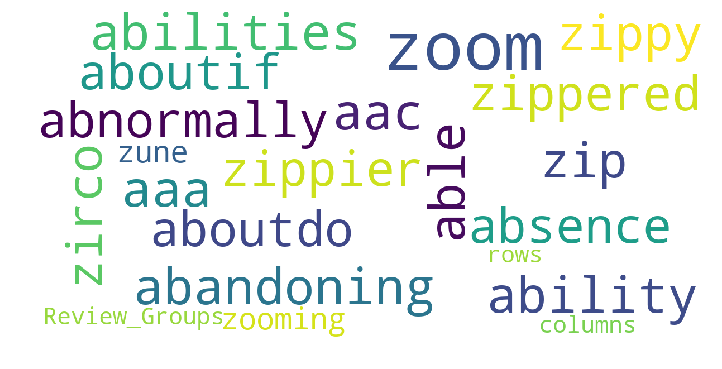

In [74]:
show_wordcloud(corpus_2)

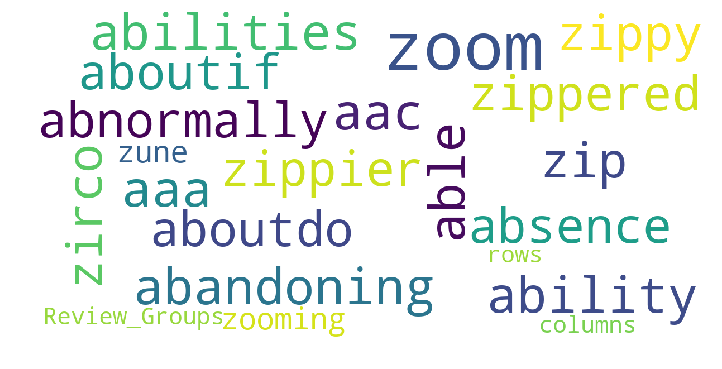

In [75]:
show_wordcloud(corpus_3)

# Q4.	Using imdb movies reviews data set (imdb_sentiment.csv: https://bit.ly/2S2yXEd), create a supervised model to predict the sentiment of user reviews.
a.	Create a word cloud using the user reviews
b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).
c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
d.	Build various supervised classification models using the training data set
e.	Predict and compute accuracy of the model on test data set
f.	Identify which model is best for sentiment predicti

In [44]:
dataset=pd.read_csv('imdb_sentiment.csv')

In [45]:
dataset.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


# a.	Create a word cloud using the user reviews

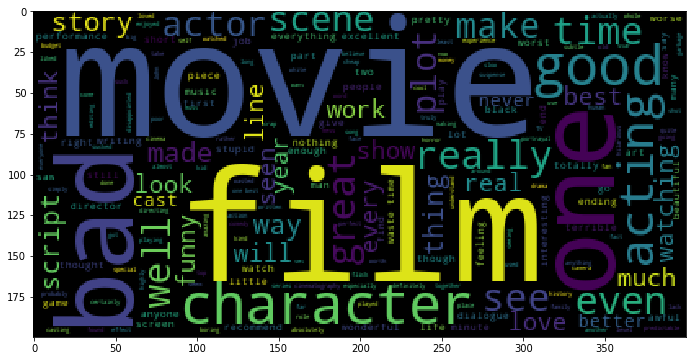

In [46]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(dataset['review']))
plt.figure(figsize=(14,6))
plt.imshow(wc)
plt.show()

# b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk

stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(np.setdiff1d(stop_words,['not']))
junk_words=[]
stop_words.extend(junk_words)
stemmer=nltk.PorterStemmer()
docs=dataset['review'].fillna('').str.lower().str.replace('[^a-z ]','')
docs_clean=docs.apply(lambda v:' '.join([stemmer.stem(word) for word in v.split(' ') if word not in stop_words]))

train,test=train_test_split(docs_clean,test_size=0.2,random_state=100)

cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

train_y=dataset.loc[train.index]['sentiment']
test_y=dataset.loc[test.index]['sentiment']

D:\jupyter notebook\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(598, 2084)
(150, 2084)
(598,)
(150,)


# c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)

1    386
0    362
Name: sentiment, dtype: int64


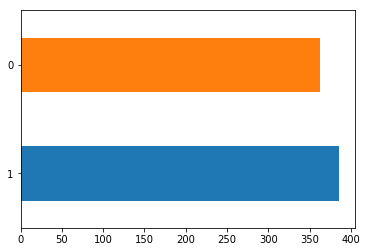

In [49]:
print(dataset['sentiment'].value_counts())
dataset['sentiment'].value_counts().plot(kind='barh')

# this data is not an imbalanced dataset

# d.	Build various supervised classification models using the training data set

In [51]:
# Bagging Model
bagging_model=RandomForestClassifier(n_estimators=300,random_state=100)
bagging_model.fit(train_x,train_y)
pred_class=bagging_model.predict(test_x)
bg_acc=accuracy_score(test_y,pred_class)
print(bg_acc)

0.7466666666666667


In [53]:
# Logistic Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_class=lr.predict(test_x)
lr_ac=accuracy_score(test_y,pred_class)
print(lr_ac)

0.76


In [56]:
from sklearn.neighbors import KNeighborsClassifier
l=[]
for i in range(1,20):
    classifier2=KNeighborsClassifier(n_neighbors=i)
    classifier2.fit(train_x,train_y)
    y_pred_train = classifier2.predict(test_x)
    recall_train_lr = accuracy_score(test_y,y_pred_train)
    l.append(recall_train_lr)

In [57]:
print(l.index(max(l)))
print(max(l))

2
0.66


In [76]:
from sklearn.neighbors import KNeighborsClassifier
kr=KNeighborsClassifier(n_neighbors=2)
kr.fit(train_x,train_y)
pred_class=kr.predict(test_x)
kr_ac=accuracy_score(test_y,pred_class)

# e.	Predict and compute accuracy of the model on test data set

In [77]:
compute_dataset=pd.DataFrame({'model':['RandomForestClassifier','LogisticRegression','KNeighborsClassifier'],'accuracy':[bg_acc,lr_ac,kr_ac]})
compute_dataset

,model,accuracy
0,RandomForestClassifier,0.746667
1,LogisticRegression,0.760000
2,KNeighborsClassifier,0.620000


# f.	Identify which model is best for sentiment prediction

Logistic Regression is the best model for sentiment prediction

# Q5) 5. Identify sentiment for the imdb user reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.

D:\jupyter notebook\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


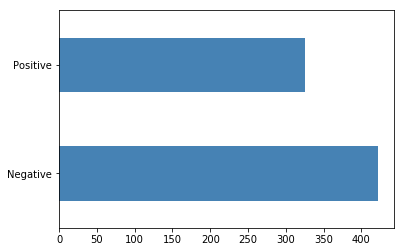

In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti=SentimentIntensityAnalyzer()

%matplotlib inline
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score<0.25:
        return 'Negative'
    else :
        return 'Positive'
    

dataset['sentiment_scores']=dataset['review'].apply(get_sentiment_score)
dataset['sentiment_vader']=dataset['sentiment_scores'].apply(get_sentiment)
#hotstar['sentiment_scores'].plot.hist()
dataset['sentiment_vader'].value_counts().plot.barh(color='steelblue')

In [86]:
dataset['sentiment_vader'].replace(['Negative','Positive'],[0,1],inplace=True)
from sklearn.metrics import accuracy_score
ac=accuracy_score(dataset['sentiment'],dataset['sentiment_vader'])
print(ac)

0.7887700534759359


# By going with the Unsupervised modelling i got the better accuracy than the Supervised modelling

# 6.	Apply topic modelling to cluster news based on their headlines. Using abcnews.csv (https://github.com/skathirmani/datasets/raw/master/abcnews.csv.zip file, randomly select 10,000 rows. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [87]:
dataset_abc=pd.read_csv('abcnews.csv')

In [88]:
dataset_abc.shape

(1103665, 2)

In [89]:
random_subset =dataset_abc.sample(n=10000)

In [90]:
random_subset.head()

,publish_date,headline_text
961907,20150623,lake mac council votes not to evict long term ...
1322,20030225,kiwis delay brawl report
984773,20151002,douglas disclose
256795,20060819,emerton looks to continue cup heroics with
1035107,20160728,one plus one: lily brett


In [92]:
random_subset.shape

(10000, 2)

In [93]:
import gensim

D:\jupyter notebook\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [94]:
docs=random_subset['headline_text'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

961907     lake mac council votes not to evict long term ...
1322                                kiwis delay brawl report
984773                                      douglas disclose
256795            emerton looks to continue cup heroics with
1035107                              one plus one lily brett
Name: headline_text, dtype: object

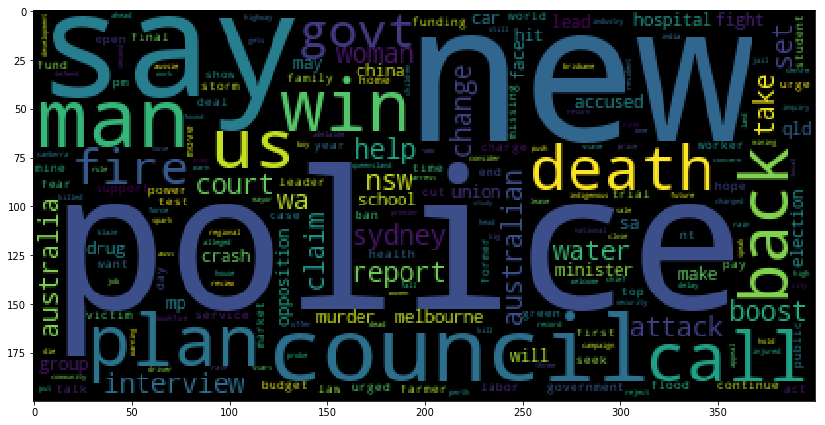

In [96]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs))
plt.figure(figsize=(14,8))
plt.imshow(wc)

In [97]:
docs_clean=[]
stopwords=nltk.corpus.stopwords.words('english')
junk_words=['say','set','qld','will']
stopwords.extend(junk_words)
 
for doc in docs:
    row_words=[word for word in doc.split(' ') if word not in stopwords]
    docs_clean.append(row_words)

len(docs_clean)

10000

In [98]:
import gensim
dictionary=gensim.corpora.Dictionary(docs_clean)

In [99]:
docs_bow=[dictionary.doc2bow(doc) for doc in docs_clean]

In [100]:
ldamodel=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=4)
ldamodel

In [101]:
ldamodel.print_topics()

[(0,
  '0.013*"police" + 0.006*"man" + 0.006*"new" + 0.006*"council" + 0.004*"says" + 0.004*"us" + 0.003*"help" + 0.003*"court" + 0.003*"accused" + 0.003*"plan"'),
 (1,
  '0.006*"new" + 0.004*"man" + 0.004*"death" + 0.004*"charged" + 0.004*"fire" + 0.003*"police" + 0.003*"guilty" + 0.003*"crash" + 0.003*"group" + 0.003*"back"'),
 (2,
  '0.009*"" + 0.007*"interview" + 0.004*"australia" + 0.003*"says" + 0.003*"change" + 0.003*"court" + 0.003*"police" + 0.003*"final" + 0.002*"dead" + 0.002*"found"'),
 (3,
  '0.024*"" + 0.004*"day" + 0.004*"country" + 0.004*"water" + 0.003*"wa" + 0.003*"rural" + 0.003*"may" + 0.003*"farmers" + 0.003*"cup" + 0.003*"hour"')]

In [102]:
df_topic2word=pd.DataFrame()
for topic_number in range(4):
    df=pd.DataFrame(ldamodel.get_topic_terms(topic_number),columns=['wordid','prob'])
    df['word']=df['wordid'].apply(lambda v: dictionary[v])
    df['topic']=topic_number
    df_topic2word=df_topic2word.append(df,ignore_index=True)

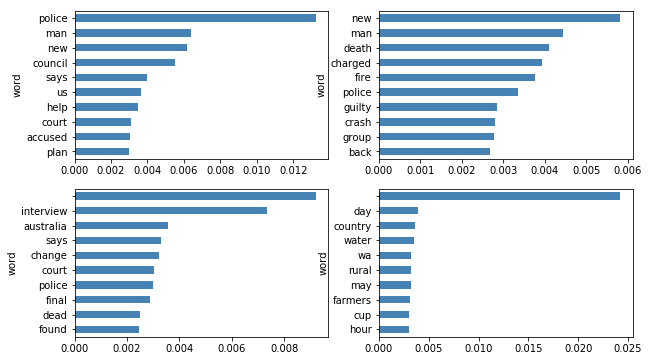

In [103]:
import matplotlib.pyplot as plt
df_topic2word.index=df_topic2word['word']
fig,axs=plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==1]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,1],figsize=(10,6))
df_topic2word[df_topic2word['topic']==2]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==3]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,1],figsize=(10,6))

In [ ]:
a=[]
for i in range(2,10):
    ldamodel=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=i)
    a.append(ldamodel.print_topics())

""
